<a href="https://colab.research.google.com/github/CynthiaTheDataTechie/customer-segmentation/blob/main/Harnessing_Price_Sensitivity_for_Effective_Customer_Segmentation_with_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabulate

In [ ]:
!pip install seaborn

In [ ]:
!pip install termcolor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')


In [ ]:
import warnings

warnings.filterwarnings("ignore")


In [ ]:
Path = ('/content/drive/MyDrive/Machinelearning/OnlineSales.xlsx')

In [ ]:
df = pd.read_excel(Path)
pd.set_option('display.max_columns', None)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:


# Calculate total sales for each transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalSales          0
dtype: int64

In [ ]:
df= df.dropna() #dropping null values in the dataframe
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
dtype: int64

In [ ]:
df.loc[:, 'Quantity'] = df['Quantity'].astype(float)

# Check for rows where Quantity is negative or zero
negative_zero_quantity = df[df['Quantity'] <= 0]

# Check for rows where TotalSales is negative or zero
negative_zero_sales = df[df['TotalSales'] <= 0]

# Display the results
print("Rows with negative or zero Quantity:")
print(negative_zero_quantity)
print("\nRows with negative or zero TotalSales:")
print(negative_zero_sales)

Rows with negative or zero Quantity:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalSa

In [ ]:
# Check for rows where Quantity is negative or zero
negative_zero_quantity_count = df[df['Quantity'] <= 0].shape[0]

# Check for rows where TotalSales is negative or zero
negative_zero_sales_count = df[df['TotalSales'] <= 0].shape[0]

# Display the results
print(f"Number of rows with negative or zero Quantity: {negative_zero_quantity_count}")
print(f"Number of rows with negative or zero TotalSales: {negative_zero_sales_count}")

Number of rows with negative or zero Quantity: 8905
Number of rows with negative or zero TotalSales: 8945


In [ ]:
# Group by CustomerID and aggregate the data
customer_data = df.groupby('CustomerID').agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum',
    'TotalSales': 'sum'
}).reset_index()

In [ ]:
customer_data

,CustomerID,UnitPrice,Quantity,TotalSales
0,12346.0,1.040000,0,0.00
1,12347.0,2.644011,2458,4310.00
2,12348.0,5.764839,2341,1797.24
3,12349.0,8.289041,631,1757.55
4,12350.0,3.841176,197,334.40
...,...,...,...,...
4367,18280.0,4.765000,45,180.60
4368,18281.0,5.622857,54,80.82
4369,18282.0,4.821538,98,176.60
4370,18283.0,1.614987,1397,2094.88


In [ ]:
customer_data.isnull().sum()

CustomerID    0
UnitPrice     0
Quantity      0
TotalSales    0
dtype: int64

In [ ]:
customer_data.describe() #summary statistics

,CustomerID,UnitPrice,Quantity,TotalSales
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,7.978608,1122.344007,1898.459701
std,1722.390705,144.963315,4672.790720,8219.345141
min,12346.000000,0.000000,-303.000000,-4287.630000
25%,13812.750000,2.221431,153.000000,293.362500
50%,15300.500000,2.944581,365.000000,648.075000
75%,16778.250000,3.897209,962.250000,1611.725000
max,18287.000000,8055.780000,196719.000000,279489.020000


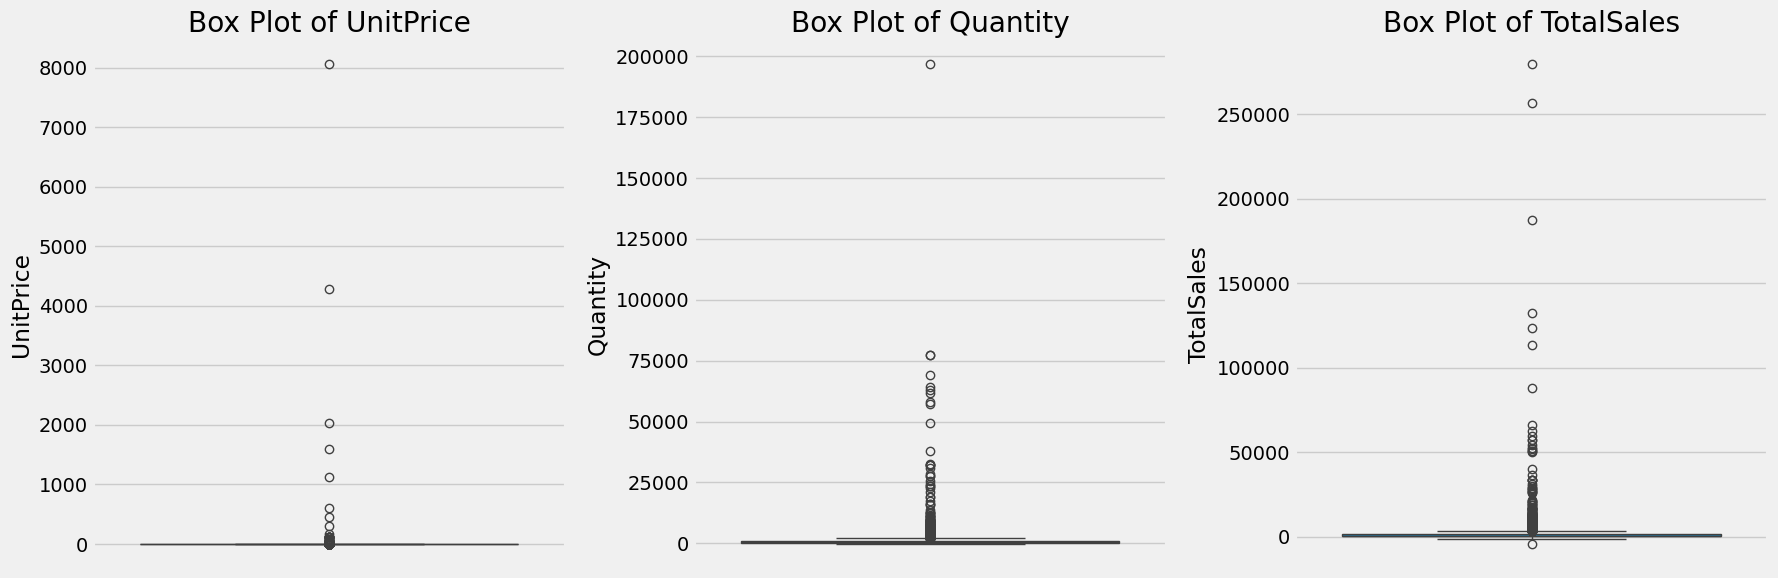

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the box plots
plt.figure(figsize=(18, 6))

# UnitPrice box plot
plt.subplot(1, 3, 1)
sns.boxplot(y=customer_data['UnitPrice'])
plt.title('Box Plot of UnitPrice')

# Quantity box plot
plt.subplot(1, 3, 2)
sns.boxplot(y=customer_data['Quantity'])
plt.title('Box Plot of Quantity')

# TotalSales box plot
plt.subplot(1, 3, 3)
sns.boxplot(y=customer_data['TotalSales'])
plt.title('Box Plot of TotalSales')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = customer_data[['UnitPrice', 'Quantity', 'TotalSales']].quantile(0.25)
Q3 = customer_data[['UnitPrice', 'Quantity', 'TotalSales']].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_customer_data = customer_data[~((customer_data[['UnitPrice', 'Quantity', 'TotalSales']] < lower_bound) |
                                         (customer_data[['UnitPrice', 'Quantity', 'TotalSales']] > upper_bound)).any(axis=1)]

print(f"Original Customer DataFrame shape: {customer_data.shape}")
print(f"Filtered Customer DataFrame shape: {filtered_customer_data.shape}")

Original Customer DataFrame shape: (4372, 4)
Filtered Customer DataFrame shape: (3660, 4)


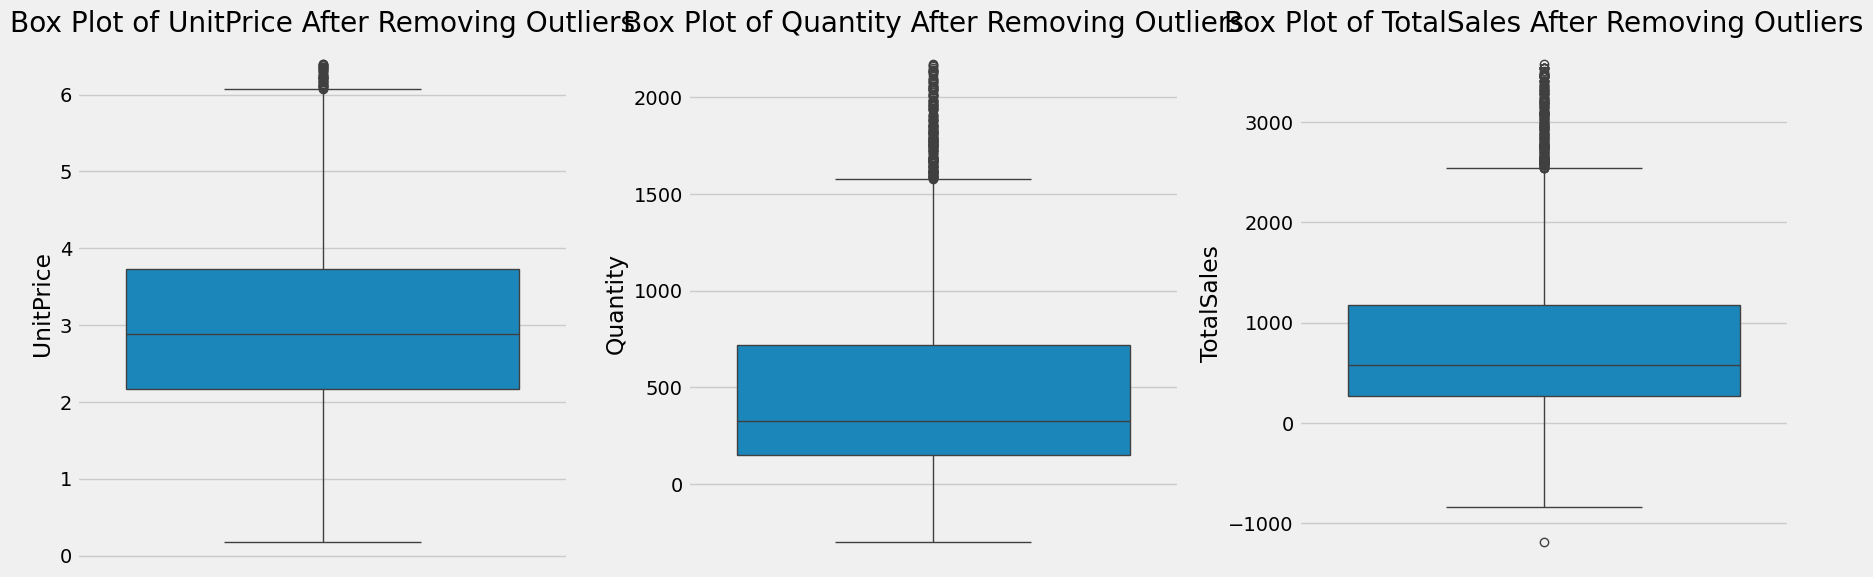

In [ ]:
# Plotting the box plots for the filtered data
plt.figure(figsize=(18, 6))

# UnitPrice box plot
plt.subplot(1, 3, 1)
sns.boxplot(y=filtered_customer_data['UnitPrice'])
plt.title('Box Plot of UnitPrice After Removing Outliers')

# Quantity box plot
plt.subplot(1, 3, 2)
sns.boxplot(y=filtered_customer_data['Quantity'])
plt.title('Box Plot of Quantity After Removing Outliers')

# TotalSales box plot
plt.subplot(1, 3, 3)
sns.boxplot(y=filtered_customer_data['TotalSales'])
plt.title('Box Plot of TotalSales After Removing Outliers')

plt.tight_layout()
plt.show()

Correlation Matrix After Removing Outliers:
            UnitPrice  Quantity  TotalSales
UnitPrice    1.000000 -0.176416    0.073598
Quantity    -0.176416  1.000000    0.888596
TotalSales   0.073598  0.888596    1.000000


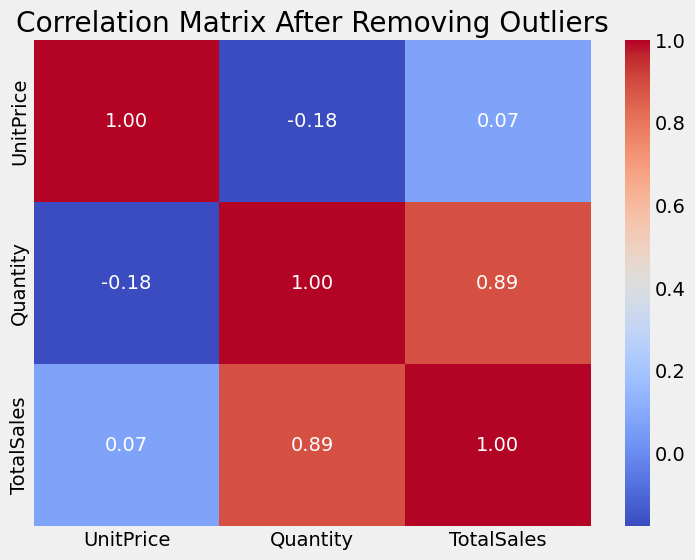

In [ ]:
#Check correlation after removing outliers
correlation_matrix_after = filtered_customer_data[['UnitPrice', 'Quantity', 'TotalSales']].corr()
print("Correlation Matrix After Removing Outliers:")
print(correlation_matrix_after)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Removing Outliers')
plt.show()

In [ ]:

# Select features for clustering
features = filtered_customer_data[['UnitPrice', 'TotalSales']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

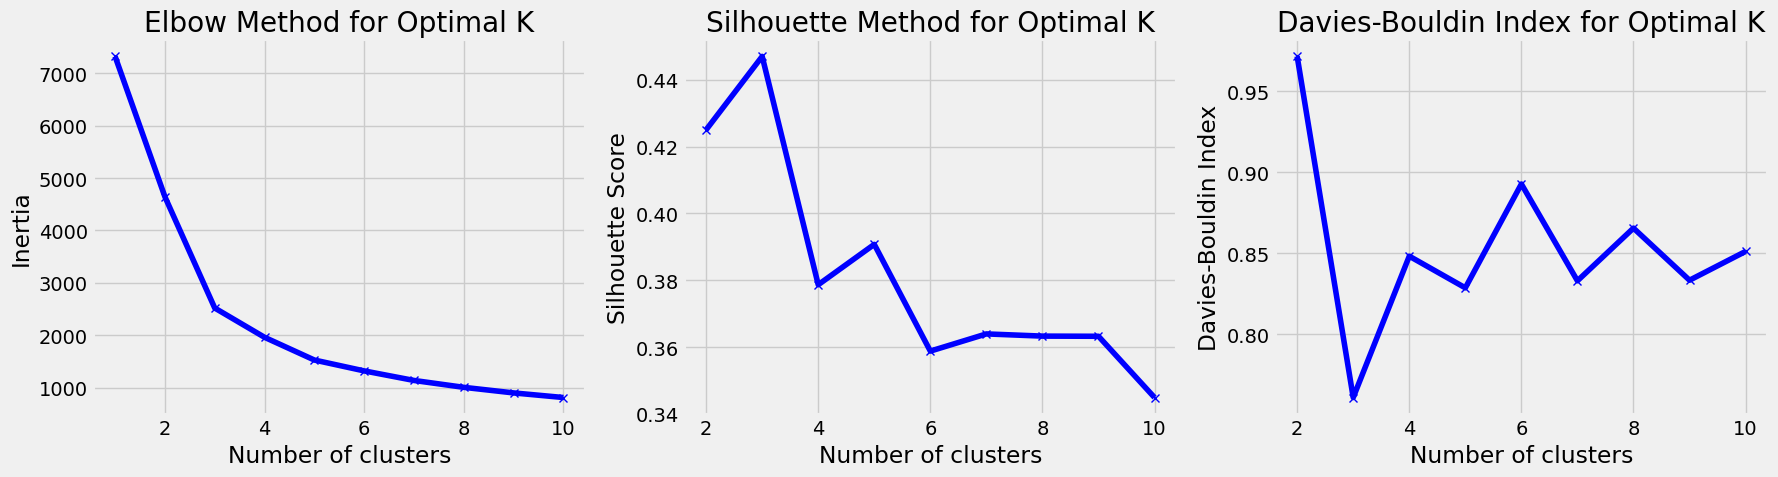

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Select features for clustering
features = filtered_customer_data[['UnitPrice', 'TotalSales']]

# Standardise the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Silhouette Method
silhouette_scores = []
K_silhouette = range(2, 11)
for k in K_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Davies-Bouldin Index
davies_bouldin_scores = []
for k in K_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, labels))

# Plotting the three methods side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method
axes[0].plot(K, inertia, 'bx-')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal K')

# Silhouette Method
axes[1].plot(K_silhouette, silhouette_scores, 'bx-')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Method for Optimal K')

# Davies-Bouldin Index
axes[2].plot(K_silhouette, davies_bouldin_scores, 'bx-')
axes[2].set_xlabel('Number of clusters')
axes[2].set_ylabel('Davies-Bouldin Index')
axes[2].set_title('Davies-Bouldin Index for Optimal K')

plt.tight_layout()
plt.show()




The optimal number of clusters based on the silhouette method is: 3
      CustomerID  UnitPrice  Quantity  TotalSales  Cluster
0        12346.0   1.040000         0        0.00        0
4        12350.0   3.841176       197      334.40        2
6        12353.0   6.075000        20       89.00        2
7        12354.0   4.503793       530     1079.40        2
8        12355.0   4.203846       240      459.40        2
...          ...        ...       ...         ...      ...
4367     18280.0   4.765000        45      180.60        2
4368     18281.0   5.622857        54       80.82        2
4369     18282.0   4.821538        98      176.60        2
4370     18283.0   1.614987      1397     2094.88        1
4371     18287.0   1.493571      1586     1837.28        1

[3660 rows x 5 columns]


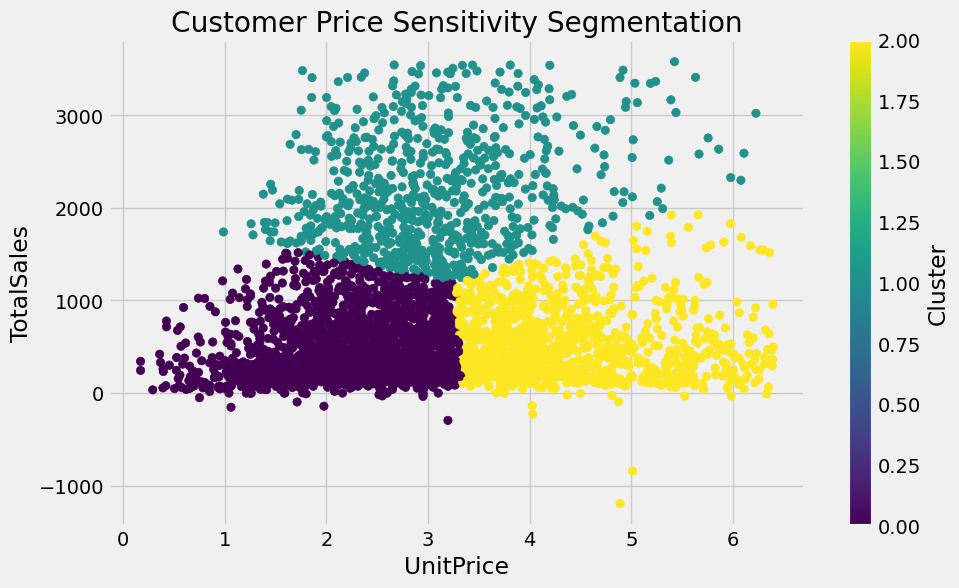

In [ ]:
# Choosing the optimal number of clusters based on silhouette method
optimal_k = K_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on the silhouette method is: {optimal_k}")

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
filtered_customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the DataFrame with cluster labels
print(filtered_customer_data)

# Visualise the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_customer_data['UnitPrice'], filtered_customer_data['TotalSales'], c=filtered_customer_data['Cluster'], cmap='viridis')
plt.xlabel('UnitPrice')
plt.ylabel('TotalSales')
plt.title('Customer Price Sensitivity Segmentation')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from IPython.display import display

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse the clusters
cluster_analysis = filtered_customer_data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'UnitPrice': 'mean',
    'Quantity': 'mean',
    'TotalSales': 'mean'
}).rename(columns={
    'CustomerID': 'CustomerCount',
    'UnitPrice': 'avg_UnitPrice',
    'Quantity': 'avg_Quantity',
    'TotalSales': 'avg_Sales'
}).reset_index()

# Display the DataFrame with cluster analysis
display(cluster_analysis)



,Cluster,CustomerCount,avg_UnitPrice,avg_Quantity,avg_Sales
0,0,1866,2.247625,363.225080,490.760697
1,1,737,3.041679,1229.759837,2164.636175
2,2,1057,4.361486,244.550615,555.855035


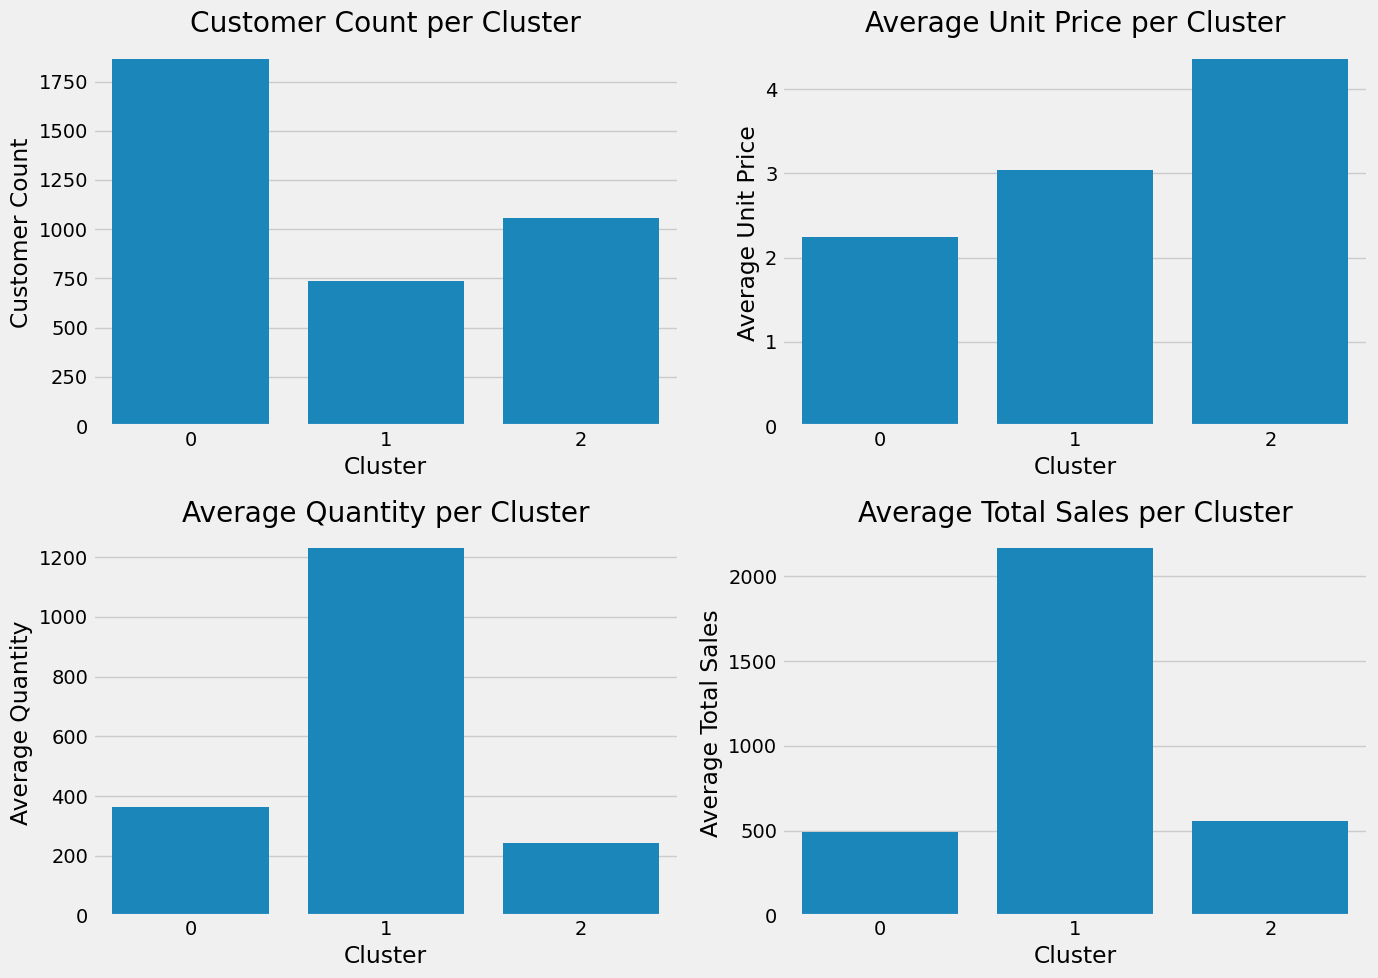

In [ ]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Customer Count
sns.barplot(ax=axes[0, 0], x='Cluster', y='CustomerCount', data=cluster_analysis)
axes[0, 0].set_title('Customer Count per Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Customer Count')

# Average Unit Price
sns.barplot(ax=axes[0, 1], x='Cluster', y='avg_UnitPrice', data=cluster_analysis)
axes[0, 1].set_title('Average Unit Price per Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Unit Price')

# Average Quantity
sns.barplot(ax=axes[1, 0], x='Cluster', y='avg_Quantity', data=cluster_analysis)
axes[1, 0].set_title('Average Quantity per Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Quantity')

# Average Total Sales
sns.barplot(ax=axes[1, 1], x='Cluster', y='avg_Sales', data=cluster_analysis)
axes[1, 1].set_title('Average Total Sales per Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Total Sales')

plt.tight_layout()
plt.show()
